# Perkenalan

Nama/batch = Sandika/008

sandika-008.herokuapp.com

# Import Pustaka

In [2]:
import pandas as pd
import numpy as np
import streamlit as st
import matplotlib as plt
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Data Loading

In [3]:
df=pd.read_csv('supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# Data Cleaning

In [5]:
df.isnull().sum() #tidak ada data yang bernilai NaN

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.rename(columns = {'gross income' : 'gross_income'}, inplace = True)
df.rename(columns = {'Customer type' : 'customer_type'}, inplace = True)

In [ ]:
warna=['salmon','darkorange','steelblue','plum','cyan','gold']

# Eksplorasi Data

In [ ]:
df_kota_penghasilan=df.groupby('City')['gross_income'].mean()
df_kota_penghasilan.head()

City
Mandalay     15.232024
Naypyitaw    16.052367
Yangon       14.874001
Name: gross_income, dtype: float64

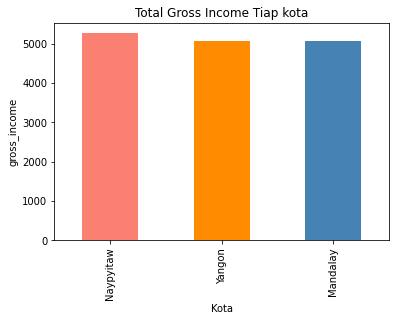

In [ ]:
fig1,ax1 = plt.subplots()

df.groupby('City').sum()['gross_income'].sort_values(ascending=False).plot(kind='bar',ax=ax1,color=warna)

ax1.set_title('Total Gross Income Tiap kota') 
ax1.set_xlabel('Kota') 
ax1.set_ylabel('gross_income') 
plt.show()

In [ ]:
df_member_penghasilan=df.groupby('customer_type')['gross_income'].sum()
df_member_penghasilan.head()

customer_type
Member    7820.164
Normal    7559.205
Name: gross_income, dtype: float64

In [ ]:
df_member_penghasilan1=df.groupby('customer_type')['gross_income'].sum()
df_member_penghasilan1.head

<bound method NDFrame.head of customer_type
Member    7820.164
Normal    7559.205
Name: gross_income, dtype: float64>

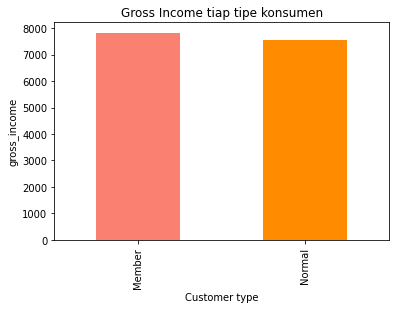

In [ ]:
fig2,ax2 = plt.subplots()

df.groupby('customer_type').sum()['gross_income'].sort_values(ascending=False).plot(kind='bar',ax=ax2,color=warna)

ax2.set_title('Gross Income tiap tipe konsumen') 
ax2.set_xlabel('Customer type') 
ax2.set_ylabel('gross_income') 
plt.show()

In [ ]:
df_gender_pembayaran=df.groupby('Gender')['gross_income'].sum()
df_gender_pembayaran.head()

Gender
Female    7994.425
Male      7384.944
Name: gross_income, dtype: float64

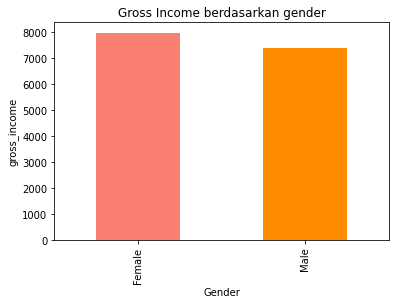

In [ ]:
fig3,ax3 = plt.subplots()

df.groupby('Gender').sum()['gross_income'].sort_values(ascending=False).plot(kind='bar',ax=ax3,color=warna)

ax3.set_title('Gross Income berdasarkan gender') 
ax3.set_xlabel('Gender') 
ax3.set_ylabel('gross_income') 
plt.show()

In [ ]:
df_kota_rating=df.groupby('City')['Rating'].mean()
df_kota_rating.head()

City
Mandalay     6.818072
Naypyitaw    7.072866
Yangon       7.027059
Name: Rating, dtype: float64

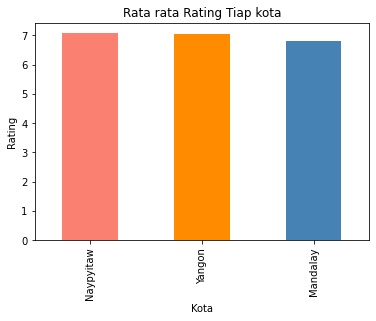

In [ ]:
fig4,ax4 = plt.subplots()

df.groupby('City').mean()['Rating'].sort_values(ascending=False).plot(kind='bar',ax=ax4,color=warna)

ax4.set_title('Rata rata Rating Tiap kota') 
ax4.set_xlabel('Kota') 
ax4.set_ylabel('Rating') 
plt.show()

In [ ]:
df_kota_pembayaran=df.groupby('Product line')['gross_income'].sum()
df_kota_pembayaran.head()

Product line
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Food and beverages        2673.5640
Health and beauty         2342.5590
Home and lifestyle        2564.8530
Name: gross_income, dtype: float64

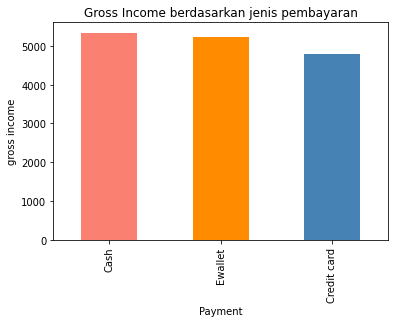

In [ ]:
fig5,ax5 = plt.subplots()

df.groupby('Payment').sum()['gross_income'].sort_values(ascending=False).plot(kind='bar',ax=ax5,color=warna)

ax5.set_title('Gross Income berdasarkan jenis pembayaran') 
ax5.set_xlabel('Payment') 
ax5.set_ylabel('gross income') 
plt.show()

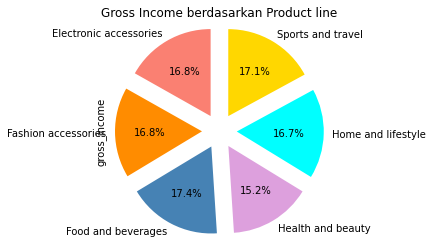

In [ ]:
fig6,ax6 = plt.subplots()

df.groupby('Product line').sum()['gross_income'].plot(kind='pie',ax=ax6,autopct='%1.1f%%',startangle=90, colors=warna,explode=[0.2,0.2,0.2,0.2,0.2,0.2])

ax6.set_title('Gross Income berdasarkan Product line')  
plt.show()

In [ ]:
df_kota_pembayaran_jumlah=df.groupby('City')['Payment'].value_counts()
df_kota_pembayaran_jumlah.head

<bound method NDFrame.head of City       Payment    
Mandalay   Ewallet        113
           Cash           110
           Credit card    109
Naypyitaw  Cash           124
           Ewallet        106
           Credit card     98
Yangon     Ewallet        126
           Cash           110
           Credit card    104
Name: Payment, dtype: int64>

# Measure of Central Tendency

In [ ]:
print ('Mean :', df['gross_income'].mean())
print ('Median :', df['gross_income'].median())
print ('Mode :', df['gross_income'].mode())

Mean : 15.379368999999999
Median : 12.088000000000001
Mode : 0     4.1540
1     4.4640
2     8.3770
3     9.0045
4    10.3260
5    10.3635
6    12.5700
7    13.1880
8    22.4280
9    39.4800
Name: gross_income, dtype: float64


# Measure of Variance

In [ ]:
print ('Range :',(df['gross_income'].max() - df['gross_income'].min()))
print ('Standar deviasi :', df['gross_income'].std())
print ('Variance:', df['gross_income'].var())

Range : 49.1415
Standar deviasi : 11.708825480998659
Variance: 137.09659414448348


# Hyphotesis Testing

In [ ]:
df.head()

,Invoice ID,Branch,City,customer_type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross_income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Two Samples Independent Two Tailed Hypothesis Testing

- H0 = Apakah rata2 gross income Member = Normal
- H1 = Apakah rata2 harga gross income Member != Normal

In [ ]:
wew=df.groupby('customer_type')['gross_income'].mean()
wew.head()

customer_type
Member    15.609110
Normal    15.148707
Name: gross_income, dtype: float64

In [ ]:
Memb = df[df['customer_type']=='Member'][['Invoice ID','gross_income']].groupby('Invoice ID').sum()
biasa = df[df['customer_type']=='Normal'][['Invoice ID','gross_income']].groupby('Invoice ID').sum()
print('Rata-rata penghasilan kotor dari Konsumen dengan status member: {}'.format(np.round(Memb.gross_income.mean())))
print('Rata-rata penghasilan kotor dari Konsumen dengan status non-member: {}'.format(np.round(biasa.gross_income.mean())))

Rata-rata penghasilan kotor dari Konsumen dengan status member: 16.0
Rata-rata penghasilan kotor dari Konsumen dengan status non-member: 15.0


In [ ]:
t_stat, p_val = stats.ttest_ind(Memb,biasa)
print('P-value:',p_val)#the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: [0.53439496]
t-statistics: [0.62152687]


C:\Users\Sandika\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sandika\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


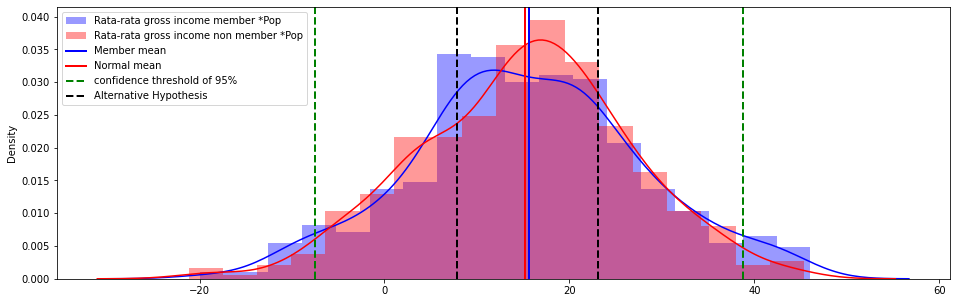

In [ ]:
Memb_pop = np.random.normal(Memb.gross_income.mean(), Memb.gross_income.std(),500)
biasa_pop = np.random.normal(biasa.gross_income.mean(), biasa.gross_income.std(),500)

ci = stats.norm.interval(0.95,Memb.gross_income.mean(), Memb.gross_income.std())
plt.figure(figsize=(16,5))
sns.distplot(Memb_pop, label='Rata-rata gross income member *Pop',color='blue')
sns.distplot(biasa_pop, label='Rata-rata gross income non member *Pop',color='red')


plt.axvline(Memb.gross_income.mean(), color='blue', linewidth=2, label='Member mean')
plt.axvline(biasa.gross_income.mean(), color='red',  linewidth=2, label='Normal mean')


plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(Memb_pop.mean()+t_stat[0]*Memb_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(Memb_pop.mean()-t_stat[0]*Memb_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
plt.show()


# Kesimpulan

HO dimana pernyataannya adalah Apakah rata2 harga pendanaan yang sukses GB = US dapat diterima dengan alasan:

- nilai dari P-value: [0.53439496], dimana angka ini lebih besar dari 0.05
- garis alternative hypothesis masih berada didalam garis confidence threshold of 95%
- data terdistribusi secara normal, bisa ditarik kesimpulan dari bentuk grafik